# Tree-based classification models

Decission tree is used for  weather data classification and prediction.

Random forest is usde for Social_Network_Ads data.



Turn GPU on for maximum speed
Edit > Notebook Settings > Change the hardware accelerator to GPU


In [1]:
# Should give "Found GPU ..."

import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap

# Decision tree classifier: Daily weather
Weather daata was collected in San Diego, California, for a period of three years, from September 2011 to September 2014.


**A decision tree is built on an entire dataset and uses all the features/variables of interest. It is the building block of a random forest.**

In [4]:
import io
from google.colab import files
uploaded = files.upload() #open daily_weather.csv with pandas


Saving daily_weather.csv to daily_weather.csv


In [13]:
data = pd.read_csv(io.StringIO(uploaded['daily_weather.csv'].decode('utf-8')))

In [14]:
data.head() # visualise data

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [15]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

## Data pre-processing

In [16]:
data[data.isnull().any(axis=1)].head() # check for null (NaN) values

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


In [17]:
del data['number'] # 'number' column is not a feature

In [18]:
before_rows = data.shape[0]
print("Before NaN rows: " + str(before_rows))

data = data.dropna() # removing rows that contain NaN values

after_rows = data.shape[0]
print("After NaN rows: " + str(after_rows))

Before NaN rows: 1095
After NaN rows: 1064


In [19]:
before_rows - after_rows # removed rows

31

### The 9am sensor signals will be used as features to predict humidity at 3pm

X will be 9am features, y will be humidity at 3pm

Fist, the values that contain less than 24.99 relative humidity at 3pm are discared

In [20]:
clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] >24.99) *1
clean_data['high_humidity_label'].head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity_label, dtype: int64

In [21]:
y = clean_data[['high_humidity_label']].copy()
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [22]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

Store all the morning features

In [24]:
morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

New dataset x only consists of the morning features data

In [25]:
x=clean_data[morning_features].copy()
x.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [26]:
y.columns

Index(['high_humidity_label'], dtype='object')

## Build the decision tree classifier

In [27]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=324)

In [28]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
humidity_classifier.fit(X_train,y_train) # fit algorithm to train set

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [29]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

In [30]:
y_pred = humidity_classifier.predict(X_test)

In [31]:
y_pred[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [32]:
y_test['high_humidity_label'][:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: high_humidity_label, dtype: int64

In [33]:
accuracy_score(y_test,y_pred)

0.9005681818181818

90 % accuracy

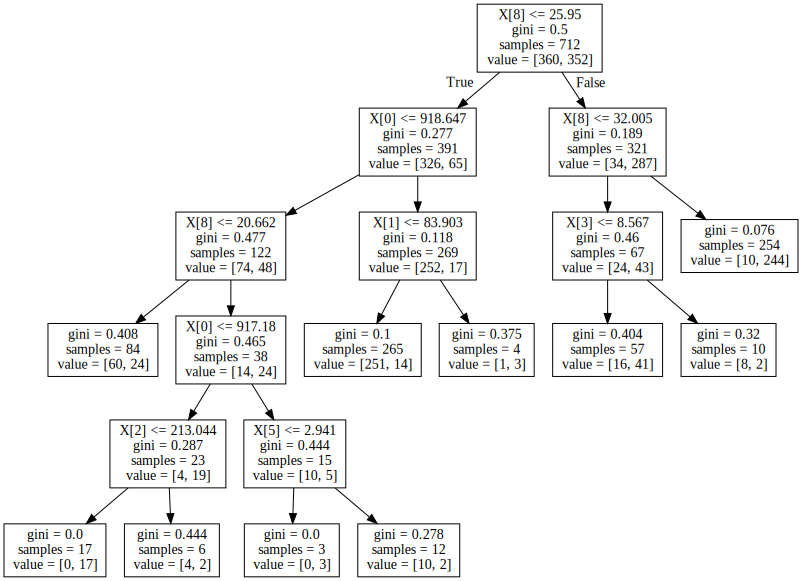

In [34]:
graph = Source(tree.export_graphviz(humidity_classifier))
SVG(graph.pipe(format='svg'))

# Random Forest classifier

Random forest to classidy Social_Network_ads data, which tells which of the users purchased/not purchased a particular product.



**A random forest randomly selects observations/rows and specific features/variables to build multiple decision trees from and then averages the results. The best class is chosen and used for predictions.**

In [47]:
#Import the dataset
uploaded = files.upload()
datasets = pd.read_csv('Social_Network_Ads.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [48]:
datasets.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Plot a heatmap of correlation among the variables

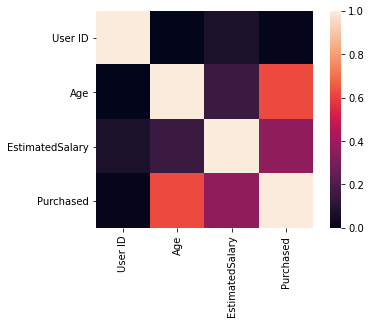

In [50]:
import seaborn as sns
datasets = datasets[['User ID','Gender','Age','EstimatedSalary','Purchased']] #Subsetting the data
cor = datasets.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [37]:
# Split the dataset into training and test sets

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [38]:
# Scale features

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


In [40]:
# fit classifier to the train set

classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
# Predict results in test set

Y_Pred = classifier.predict(X_Test)

In [51]:
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

[[64  4]
 [ 4 28]]


In [54]:
acc = classifier.score(X_Test, Y_Test)
print(acc)

0.92


92 % accuracy